In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [37]:
#installed distutils using pip install setuptools
import yfinance as yf
df = yf.download("AAPL", start="2010-01-01", end="2024-01-01")
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409364,447610800


In [38]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [39]:
df= df.reset_index() #add indexing to database
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409364,447610800


In [40]:
df= df.drop(['Date', 'Adj Close'], axis=1) #drop unwanted columns from dataset
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


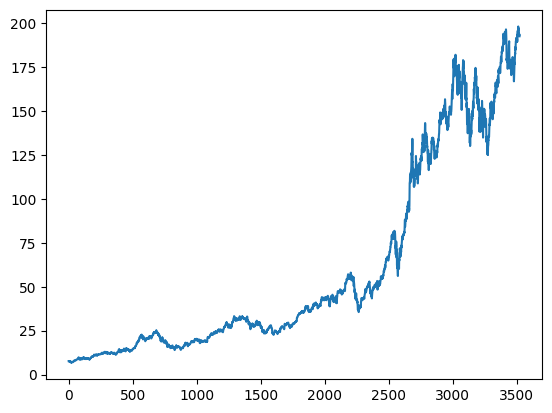

In [41]:
plt.plot(df.Close)

In [42]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3517,195.179993,195.410004,192.970001,193.600006,37122800
3518,193.610001,193.889999,192.830002,193.050003,28919300
3519,192.490005,193.500000,191.089996,193.149994,48087700
3520,194.139999,194.660004,193.169998,193.580002,34049900


In [43]:
ma100= df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    181.768301
3518    181.787101
3519    181.898701
3520    182.046001
3521    182.173301
Name: Close, Length: 3522, dtype: float64

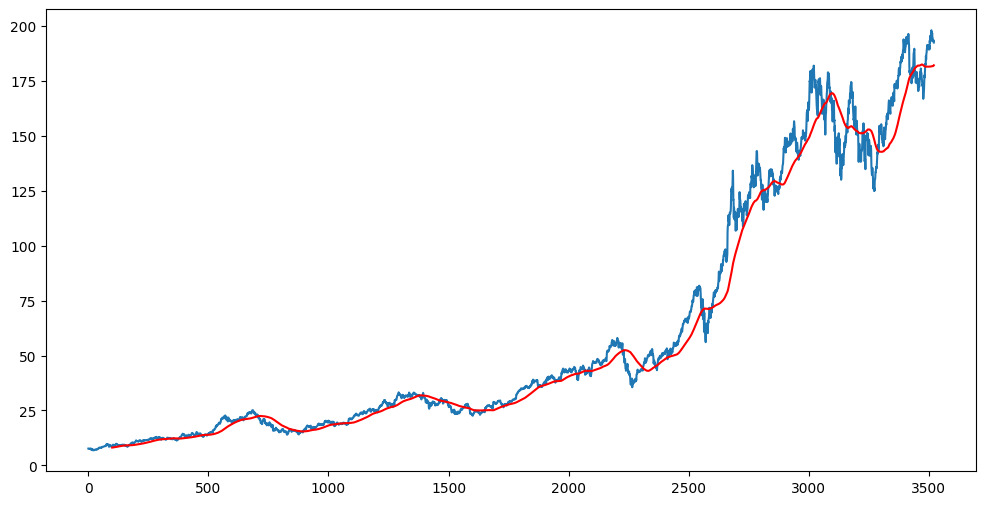

In [45]:
plt.figure(figsize= (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r') #plot the predicted data with red color

In [46]:
ma200= df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    178.649100
3518    178.871851
3519    179.085250
3520    179.290201
3521    179.487900
Name: Close, Length: 3522, dtype: float64

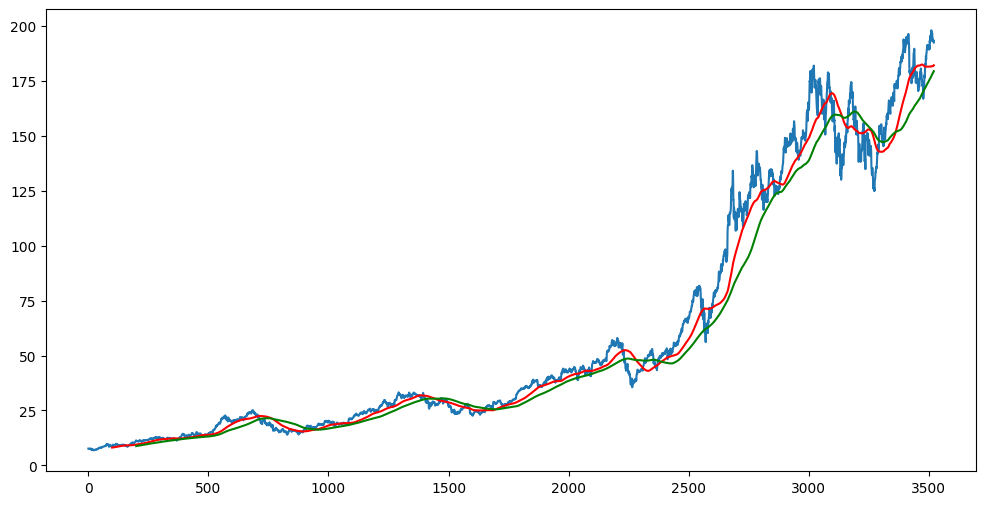

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [48]:
df.shape

(3522, 5)

In [50]:
#Spliting Data into Training and Testing
#70% is the training data and 30% is the testing one
data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2465, 1)
(1057, 1)


In [51]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [52]:
data_testing.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [54]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.01502647],
       [0.01527965],
       [0.01294631],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [57]:
x_train= []
y_train= []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
x_train, y_train= np.array(x_train), np.array(y_train)

In [59]:
x_train.shape

(2365, 100, 1)

In [60]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [62]:
#first layer
model= Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


#second layer
model.add(LSTM(units= 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

#third layer
model.add(LSTM(units= 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

#fourth layer
model.add(LSTM(units= 120, activation = 'relu'))
model.add(Dropout(0.5))


#dense layer connect all layers
model.add(Dense(units =1 ))

In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
#compilation of model
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 25s 222ms/step - loss: 0.0799
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 221ms/step - loss: 0.0093
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 224ms/step - loss: 0.0068
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 229ms/step - loss: 0.0066
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 181ms/step - loss: 0.0059
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 219ms/step - loss: 0.0060
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 222ms/step - loss: 0.0049
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 221ms/step - loss: 0.0046
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step - loss: 0.0053
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 226ms/step - loss: 0.0048
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step - loss: 0.0046
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 222ms/step - loss: 0.0045
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 181ms/step - loss: 0.0038
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - loss: 0.0040
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 

In [67]:
model.save('keras_model.h5')

In [68]:
data_testing.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [69]:
past_100_days= data_training.tail(100)

In [70]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [71]:
final_df.head()

,Close
0,44.345001
1,44.575001
2,43.767502
3,43.325001
4,44.910000


In [73]:
input_data= scaler.fit_transform(final_df)
input_data

array([[0.00658979],
       [0.00807572],
       [0.00285881],
       ...,
       [0.96795551],
       [0.97073361],
       [0.96394998]])

In [74]:
input_data.shape

(1157, 1)

In [75]:
x_test= []
y_test= []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [76]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1057, 100, 1)
(1057,)


In [77]:
#Making predictions
y_predicted = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step


In [78]:
y_predicted.shape

(1057, 1)

In [79]:
y_predicted

array([[0.14970295],
       [0.15106492],
       [0.15247215],
       ...,
       [0.9756677 ],
       [0.9724634 ],
       [0.96886754]], dtype=float32)

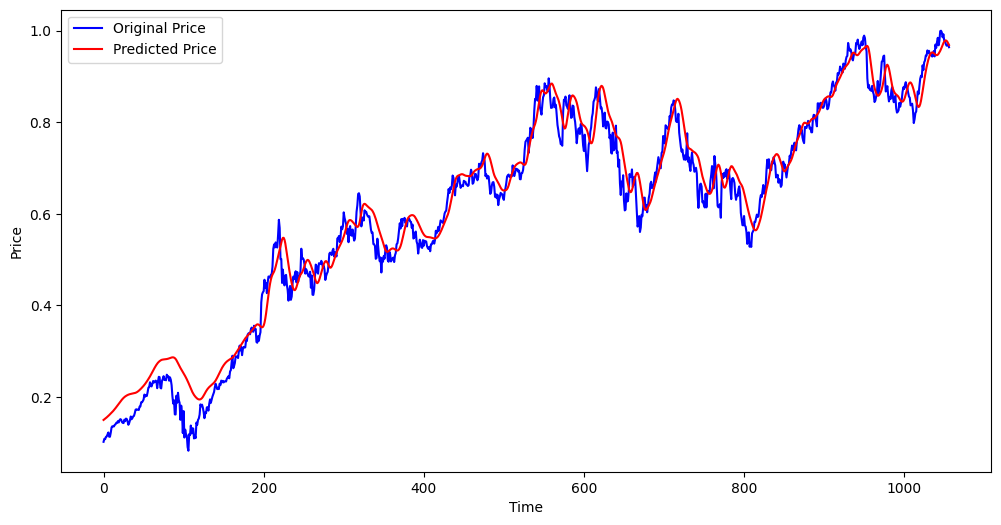

In [80]:
plt.figure(figsize= (12, 6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()